<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_7_183_227(accept201_211).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 분류
### 01 분류(Classification)의 개요

지도학습(명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식)의 대표적인 분류는 학습데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 이렇게 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측

- 베이즈 통계와 생성모델에 기반한 베이즈

- 독립변수와 종속변수의 선형관계성에 기반한 로지스틱 회귀

- 데이터 균일도에 따른 규칙 기반의 결정트리
- 개별 클래스간 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터머신
- 근접 거리를 기준으로 하는최소근접의 알고리즘
- 심층연결 기반의 신경망(neruon)
- 서로 다른(또는 같은)머신러닝 알고리즘을 결합한 알고리즘


####앙상블
배깅 + 부스팅

배깅의 대표인 랜덤포레스트, 부스팅의 대표인 그래디언트 부스팅

앙상블의 기본 알고리즘 == 결정트리
:복잡한 규칙구조를 가져야하기에 과적합 문제가 발생하여 성능 저하 또한 우려되어 앙상블에서는 적합

### 02 결정트리

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

- 규칙 노드(규칙조건) + 리프 노드(결정된 클래스값)으로 규칙조건이 새로 성생될때마다 서브 트리가 생성되며, 과적합을 방지하기 위해 깊이가 최대한 적은 상태에서(가능한 한 적은 결정 노드로)높은 예측 정확도를 갖기 바람

- 이를 위해선 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정노드의 규칙이 정해져야 함

- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 생성함

- 정보 균일도 측정 방법으로는 엔트로피를 이용한 정보이득 지수 ( 주어진 집합의 혼잡도 )와 지니계수 (지니계수가 낮을 수록 데이터 균일도가 높은 것으로 지니계수가 낮은 속성을 기준으로 분할)가 있으나 사이킷런에서 구현한 DecisionTreeClassifier는 지니계수를 이용하여 데이터 세트를 분할함

#### 결정트리 모델의 특징

균일도라는 룰을 기반으로 하여 시각화까지 가능하도록 명확하며,

균일도만 신경쓰면 되므로 전처리 작업이 필요없음

단 과적합 문제가 있을 수 있으니 완벽한 트리모형은 없다고 인정하고 들어가는 것이 성능튜닝에 더욱 도움이 됨

####결정트리 파라미터
- DecisionTreClassifier(for classification)와 DecisionTreeRegressor(For regression)으로 분류에 대해서만 다루고자 함

- DecisionTreeClassifier와 리그레서 모델 모두 동일한 파라미터 사용

- (1) min_samples_split

    :노드 분할을 위한 최소한의 샘플 데이터 수로 과적합 제어를 위해 사용되며, 디폴트는 2이고 작을수록, 1로 설정될 경우 분할되는 노드가 많아져서 과적합 가능성 증가

  (2) min_samples_leaf

    :말단 노드가 되기 위한 최소한의 샘플 수

    Minsamplessplit과 유사하게 과적합 제어용도이나 비대칭적 데이터의 경우에서는 작게 설정 필요

  (3) max_features

    :최적의 분할을위해 고려할 최대 피처 개수로 디폴트는 None이라 모든 피처를 사용해 분할 수행

    int형으로 지정하면 피처의 개수, float로 지정하면 전체 피처 중 대상 피처의 퍼센트

    'sort'는 전체피처 중 sqrt(전체피처개수)

    'auto'로 지정시 sqrt와 동일

    'log'는 전체 피처 중 log2(전체피처개수) 선정

    'None'은 전체 피처 개수 선정

  (4) max_depth

    트리의 최대 깊이 규정

    디폴트는 None, 완벽한 클래스 결정까지 깊이를 계속 키워 분할하거나 노드가 갖는 데이터개수가 min_sample_split보다 작아질 때까지 깊이를 증가시킴

    깊이가 깊어지면 과적합 문제가 발생할 수 있으니 적절한 값 제어 요망

  (5) max_leaf_nodes
    :말단 노드의 최대 개수


#### 결정트리 모델의 시각화
with  GRPHVIZ 패키지

파이썬용이 아니기 때문에 Graphviz설치 후 인터페이스할 수 있는 파이썬 래퍼 설치 요망(Wrapper)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃데이터 로딩, 학습과 테스트 데이터로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

In [3]:
#export_graphviz()의 호출결과로 out_file로 지정된 tree.dotd 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

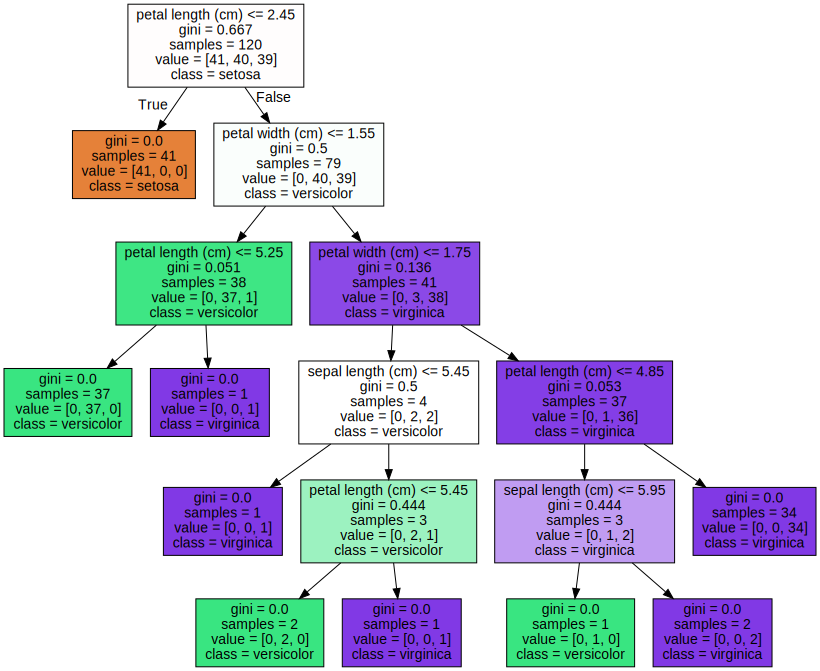

In [4]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어 주피터노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

#####시각화된 도표를 이용해 결정트리규칙이 어떻게 구성되는지 알아보자

- petal length(cm)<=2.45와 같이 피처의 조건이 있는 것은 자식 노들르 만들기 위한 규칙 조건으로, 이게 없을 경우 리프노드

- gini는 다음의 value=[]로 주어진 데이터분포에서의 지니계수

- samples 는 현 규칙에 해당하는 데이터 건수

- value=[]는 클래스값 기반의 데이터 건수로, 붓꽃데이터 세트는 클래스값으로 0,1,2를 가지며 value=[33,44,55]를 나타낼 경우 0인 클래스 33개, 1인 클래스 44개, 2인 클래스 55개를 의미

#####1번노드의 지표설명

samples=120: 전체데이터가 120개

value=[41,40,39] == Setosa 41, Versicolor 40, Virginica 39

sample 120개가 value를 다음과 같이 가지므로, 지니계수는 0.667

petal length <=2.45를 통해 자식노드 생성

class= setosa 는 하위노드를 가질 경우 setosa의 개수가 41개로 제일 많다는 의미

####2번 노드의 지표설명
지니계수 0의 41개의 샘플데이터 모두 setosa임

####3번노드의 지표설명
Petal length <= 2.45가 false인 규칙노드로 지니계수는 여전히 0.5로 다음 브랜치노드로 분기해야할 필요가 있어 petal width <= 1.55로 추가 분기

####4번 노드의 지표설명
Petal width<=1.55가 True인 규칙노드로 대부분 Versicolor인 지니계수 0.051이나 여전히 virginica가 혼재되어 petal length <=5.25라는 새 규칙으로 자식노드 생성

#### 5번 노드 지표 설명
Petal width<=1.55 false, 대부분 virginica, 지니계수가 0.136이나 여전히 versicolor가 있어 petalwidth<=1.75로 자식노드 생성

> 이런식으로 개수를 제한해주지 않으면 끊임없이 자식노드를 생성하여 과적합 문제가 발생할 수 있으니, 미리 제어해주는 것이 중요

- min_samples_spli을 통해 최소샘플개수를 지정하거나 max_depth를 통해 최대 트리 깊이를 지정하거나, min_samples_leaf를 통해 샘플데이터건수의 최솟값을 지정하여 과적합을 방지할 수 있음

feature_importance는 ndarray 형태로 값을 반환하여 피처순서대로 값을 할당하는 것으로 값이 높을 수록 피처의 중요도가 높다는 것

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


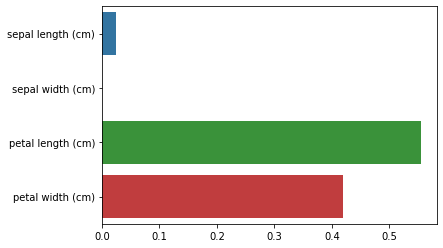

In [2]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance의 column별 시각화 
sns.barplot(x=dt_clf. feature_importances_, y=iris_data.feature_names)

###결정 트리 과적합(Overfitting)


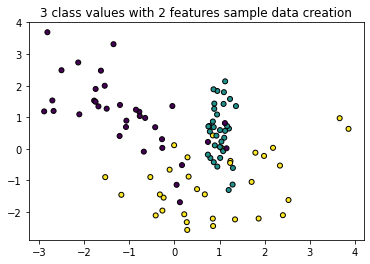

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화를 위해서는 피처 2개, 클래스 3개의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1],marker='o', c=y_labels,s=25,edgecolor='k')


In [5]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

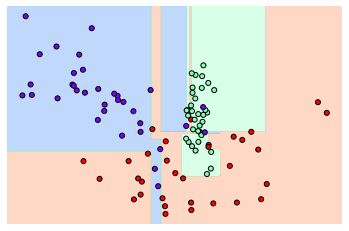

In [6]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약없는 결정트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 03 앙상블 학습
: 보팅, 배깅, 부스팅, 그 외 스태깅 등등

보팅과 배깅은 여러개의 분류기가 투표를 통해 최정 예측 결과를 결정하는 방식, 대표적으로 랜덤포레스트

개별 classifier에게 데이터를 샘플링해서 추출하는 bootstrapping 분할 방식, 개별 분류기가 부트 스트래핑 방식으로 샘플링 된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최정 예측 결과를 선정하는 방식 => 배깅 앙상블 방식

교차검증이 데이터 세트간에 중첩을 허용하지 않는것과 달리 배깅은 중첩을 허용

부스팅은 순차적으로 학습을 수행하되 분류기가 예측이 틀린 데이터에 대해서는 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것

스태깅은 여러다른가지 모델의 예측결과값을 다시 학습데이터로 만들어 다른 모델로 재학습시켜 결과를 예측

### 보깅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

하드 보팅 - 다수결 원칙과 유사, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

소프트 보팅 - 결정확률을 모두 더해 평균한 후 확률이 가장 높은 레이블 값을 최종 보팅 값으로 선정하며 일반적으로 이를 택함

### 보팅 분류기(Voting Classifier)

위스콘신 유방암 데이터 세트는 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트로 로지스틱과 KNN을 기반으로 보팅 분류기를 생성

In [7]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
#로지스틱 회귀와 KNN을 기반의 소프트보팅 방식의 보팅 분류기 생성
#기본 옵션은 hard
#개별 모델은 KNN과 로지스틱 회귀임
lr_clf=LogisticRegression()
knn_clf= KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators = [('LR', lr_clf),('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
#개별 모델의 학습 예측 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}' .format(class_name, accuracy_score(y_test, pred)))
  

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기를 여러개 결합한다 하여 성능이 향상되진 않으나 대체로 성능이 좋은 편이며

이런 방식과 마찬가지로 Ml모델의 성능은 다양한 테스트 데이터에에 의해해 검증되므로로 높은 유연성을 갖고 현실에 대처할 수 있는지가 평가 요소로서 작용하며, 따라서 편향-분산 트레이드 오프를 극복해야함

결정트리와 앙상블은 서로를 보완함

###04 random forest
####랜덤 포레스트의 개요 및 실습
배깅은 같은 알고리즘으로 여러개의 분류기를 만들어 보팅으로 최종 결정하는 방식으로 대표적인 알고리즘은 랜덤 포레스트

랜덤포레스트는 결정트리 기반의 알고리즘으로 여러개의 결정트리 분류가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨

개별적인 분류기의 기반은 결정트리이지만 개별 트리가 학습하는 데이터는 전체데이터에서 일부 중첩되는 부트스트래핑 분할 방식으로 데이터 서브셋을 생성하여 개별 데이터 서브세트에 결정트리 분류기를 각각 적용

In [20]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [42]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep='\s', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep='\s', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정트리에서 사용한 get_human_datasets()을 이용, 학습태스트용 DataFrame  반환
X_train,X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train ,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy) )

####랜덤포레스트 하이퍼 파라미터 및 튜닝

파라미터가 대체로 결정트리와 같은게 많음

- n_estimators: 랜덤 포레스트에서 결정트리의 개수 지정, 디폴트는 10개로 많이 설정할수록 성능이 좋아지긴 하나 무조건적인 향상은 아니며 수행시간도 비례하여 증가

-max_features: 결정트리 max_features와 동일하나 랜덤포레스트의 것은 none이 아닌 sqrt와 같아 트리 분할 피처를 참조할 때 전체 피처 개수의 sqrt개수만큼 참조

-max_depth, min_sample_leaf는 결정트리에서의 요소와 동일




In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[9,12,18],
    'min_samples_spit':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터', grid_cv.best_params_)
print('최고예측 정확도 {0:.4f}'.format(grid_cv.best_score_))


In [ ]:
#n_estimator 300
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('예측 정확도 {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.features_importances_
ftr_importances = pd.Seiries(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figures(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()


### 05 GBM(Gradient Boosting Machine)
#### GBM의 개요 및 실습

> 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가면서 학습하는 부스팅 알고리즘 중 대표적인 구현은 AdaBoost와 그래디언트 부스트가 있다.

1) 약한 학습기가 분류기준 +로 -를 분류한 것으로 잘못 분류된 오류데이터 2) 오류 데이터에 대해 가중치 값을 부여하고 가중치가 부여된 오류 +데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐

3) 두번째 약한 학습기가 분류기준 2로 +,-를 분류. 마찬가지로 동그라미로 표시된 - 데이터는 잘못 분류된 오류 데이터

4) 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여하여 데이터가 크진다는 커짐

5) 세번째 약한 학습기가 분류 기준으로 3으로 +와 -를 분류하고 오류 데이터를 찾는다. 에이다부스트는 이렇게 약한 학습기가 순차적으로 오류값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행한다.

6) 마지막으로 맨 아래에는 첫번째, 두번째, 세번째 약한 학습기를 모두 결합한 결과 예측으로 개별 약한 학습기보다 훨씬 정확도가 높아졌음을 알 수 있다.

> GBM: 가중치 업데이트를 경사 하강법을 이용하는 것으로 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것

- GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고 회귀도 가능

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warinings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행시간측정을위한 시작시간설정
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f}초'.format(time.time()-start_time))
#예측성능이 일반적으로는 랜덤포레스트보다 뛰어남

####GBM 하이퍼 파라미터 및 튜닝

- n_estimators, max_depth, max_features와 같은 트리 기반 파라미터는 결정트리, 랜덤포레스트와 동일

-loss: 경사 하강법에서 사용할 비용함수 지정하며 디폴트 값은 deviance

-learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률로 기본값은 0.1이며, 너무 적은 값은 업데이트 되는 값이 작아 최소오류값을 찾으며 예측 성능을 높일 수 있다. 많은 weak learner는 순차적인 반복이 필요해서 수행시간이 오래걸리고 너무 작은 경우 weak learner의 반복이 완료되도 최소오류값을 찾지 못할 수 있다. 반대로 큰 값은 그냥 지나쳐버려 예측 성능이 떨어지는 특성이 있기 때문에 learning_rate는  n_estimator와 상호보완적으로 조합하여 사용한다. learning_rate를 작게하고 n_estimator를 크게하면 한계점까지는 예측성능이 조금씩 좋아질 수 이;ㅆ으나 시간이 너무 오래걸리는 특징이 있다.

- n_estimator : weak learner의 개수로 weak learner가 순차적으로 오류를 보정하여 개수가 많을수록 예측성능이 좋아지긴 하나 수행시간이 오래걸리며, 기본값이 100임

- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율로 기본값은 1이며, 이는 전체 학습데이터를 기반으로 학습한다는 의미이고, 과적합이 우려되는 경우 subsample을 1보다 작게 설정할 수 있다.



In [ ]:
from sklearn.model_selcetion import GridSearchCV

params = {
    'n_estimators':[100,500]
    'learning_rate':[0.05, 0.1]
    }
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적하이퍼파라미터: ',grid_cv.best_params_)
print('최고예측정확도:{0:.4f}'.format(grid_cv.best_score_))

#with GridSearchCV, predict using learned estimator
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:4f}'.format(gb_accuracy))